In [1]:
# data
import pandas as pd
import numpy as np

import pycaret
import sklearn

In [1]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')
data

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target='Class variable', session_id=123)

In [3]:
# print the configuration used for data preprocessing
s._setup_params

{'data':      Number of times pregnant  \
 0                           6   
 1                           1   
 2                           8   
 3                           1   
 4                           0   
 ..                        ...   
 763                        10   
 764                         2   
 765                         5   
 766                         1   
 767                         1   
 
      Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
 0                                                  148                          
 1                                                   85                          
 2                                                  183                          
 3                                                   89                          
 4                                                  137                          
 ..                                                 ...                          
 763    

In [4]:
# run and compare the different models (here, for classification)
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:09:06
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [5]:
# print the tested models and their performance on several metrics
results = pull()
results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.335
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.009
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.012
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.090
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.010
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,1.212
gbc,Gradient Boosting Classifier,0.7373,0.7917,0.5550,0.6445,0.5931,0.4013,0.4059,0.042
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.032
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.062
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.010


For any unknown reason, lightgbm employed a long running time

In [6]:
%matplotlib widget
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

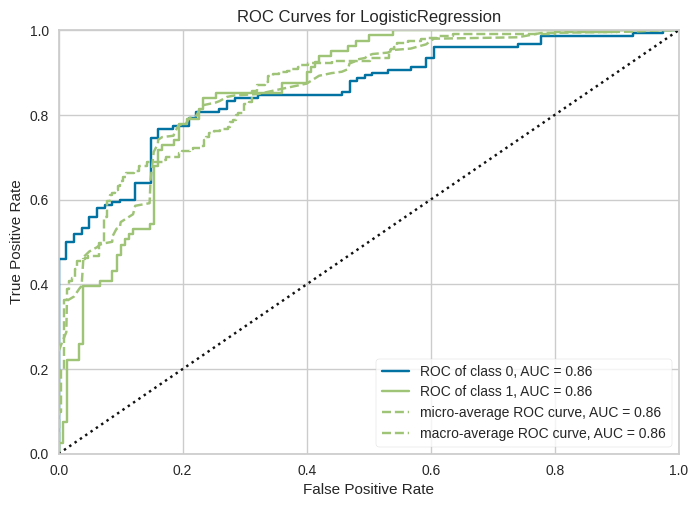

In [7]:
plot_model(best, plot='auc')

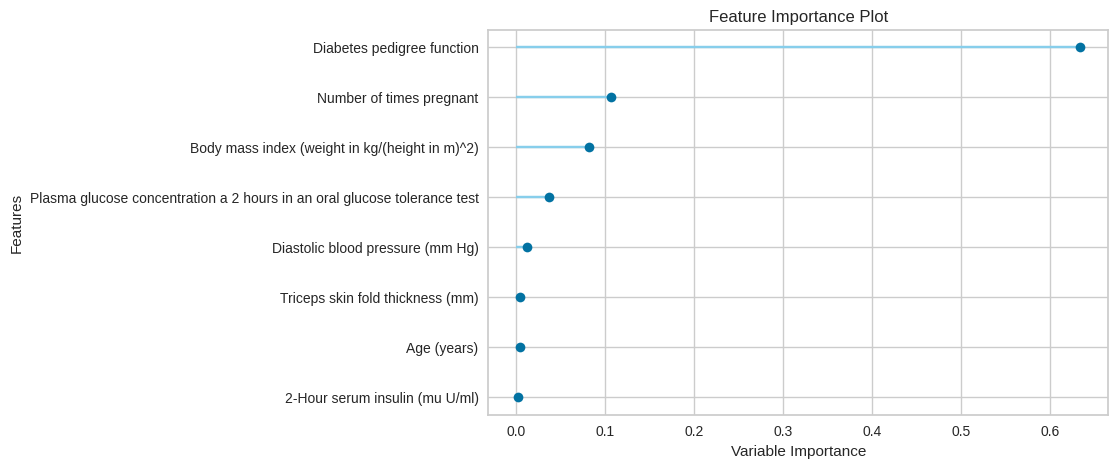

In [10]:
plot_model(best, plot='feature')

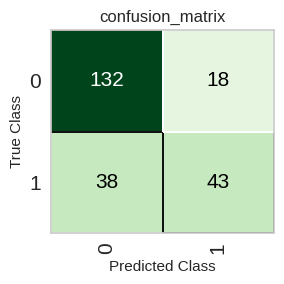

In [29]:
plot_model(best, plot='confusion_matrix',
           plot_kwargs={'title':'confusion_matrix',
                        'size':(300, 300)})

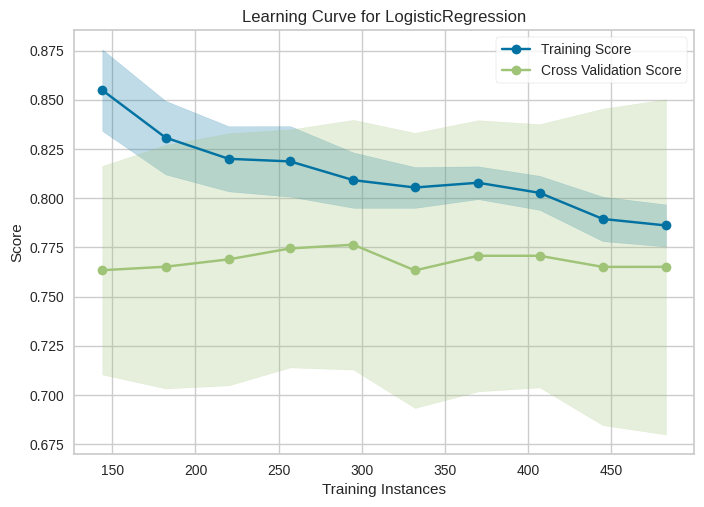

In [30]:
plot_model(best, plot='learning')

In [31]:
# make predictions of the test sample (by default, 30% of the whole dataseet)
predict_model(best)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8036
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9393
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7998
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6389
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8001
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6228
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5989
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9243


We can observe that two columns were added: prediction_label and prediction_score.
predict_score indicates the probability that the value of predict_label is the one shown.

In [33]:
# make prediction on the whole dataset
predictions = predict_model(best, data=data)
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6939
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9418
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7974
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9453
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8395
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,0,0.7415
764,2,122,70,27,0,36.799999,0.340,27,0,0,0.6391
765,5,121,72,23,112,26.200001,0.245,30,0,0,0.8072
766,1,126,60,0,0,30.100000,0.349,47,1,0,0.7289


In [36]:
# save the model (.pkl format)
save_model(best, './my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [41]:
# load the model
loaded_model = load_model('./my_best_pipeline')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [39]:
# Apply the loaded model on the wished data. Here, the whole dataset was chosen.
predictions_ = predict_model(loaded_model, data=data)
predictions_

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6939
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9418
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7974
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9453
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8395
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,0,0.7415
764,2,122,70,27,0,36.799999,0.340,27,0,0,0.6391
765,5,121,72,23,112,26.200001,0.245,30,0,0,0.8072
766,1,126,60,0,0,30.100000,0.349,47,1,0,0.7289
